# **LSB steganogrpahy**

# For Pictures


**Hiding image watermark in another image**

Load Libraries

In [ ]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct

Load Cover Image using OpenCV

In [ ]:
coverImage = cv2.imread("cat.jpg")
coverImage = cv2.cvtColor(coverImage, cv2.COLOR_BGR2RGB)

coverImageSize = len(coverImage)*len(coverImage[0])*3 #in Bytes
maxLogoSize = coverImageSize #in bits

Load Watermark to Hide

In [ ]:
with open('largetext.txt', 'rb') as fp:
    watermarkByteStream = fp.read()



In [ ]:
watermarkByteStream[0]

13

View the watermark

In [ ]:
nparr = np.frombuffer(watermarkByteStream, np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
cv2_imshow(img_np)

#https://stackoverflow.com/questions/17170752/python-opencv-load-image-from-byte-string

AttributeError: 'NoneType' object has no attribute 'clip'

Convert Bytestream to Binary

In [ ]:
def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

In [ ]:
len(watermarkByteStream)

375891

In [ ]:
watermarkAsBinaryString = ""

for byte in watermarkByteStream:
  watermarkAsBinaryString += IntegerToBinaryString(byte)

In [ ]:
len(watermarkAsBinaryString)

3007128

Convert Important Information to Bit stream

In [ ]:
watermarkBitStreamSize = len(watermarkAsBinaryString)
watermarkinformationToHide = str(watermarkBitStreamSize) + "|"

In [ ]:
watermarkinformationToHide

'3007128|'

In [ ]:
informationAsAScii = []

for letter in watermarkinformationToHide:
  informationAsAScii.extend(ord(num) for num in letter)

def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

watermarkInformationBitStream = []

for num in informationAsAScii:
  watermarkInformationBitStream.append(IntegerToBinaryString(num))

watermarkInformationBitStreamString = "".join(watermarkInformationBitStream)

In [ ]:
watermarkInformationBitStreamString

'0011001100110000001100000011011100110001001100100011100001111100'

Combine the Information Bit stream with Watermark Bit stream

In [ ]:
informationToHide = watermarkInformationBitStreamString+watermarkAsBinaryString

In [ ]:
informationToHide

'001100110011000000110000001101110011000100110010001110000111110000001101000010100101001001101111011011010110010101101111001000000110000101101110011001000010000001001010011101010110110001101001011001010111010000001101000010100101001101101000011000010110101101100101011100110111000001100101011000010111001001100101001000000110100001101111011011010110010101110000011000010110011101100101001000000111110000100000010100100110111101101101011001010110111100100000011000010110111001100100001000000100101001110101011011000110100101100101011101000010000001111100001000000100010101101110011101000110100101110010011001010010000001110000011011000110000101111001000011010000101001000001010000110101010000100000010010010000110100001010010100000101001001001111010011000100111101000111010101010100010100001101000010100101010001110111011011110010000001101000011011110111010101110011011001010110100001101111011011000110010001110011001011000010000001100010011011110111010001101000001000000110000101101100011010010110101

See if the Logo fits

In [ ]:
if len(informationToHide) > maxLogoSize-10:
  print("Logo is too big for this cover image")

Generate Random Sequence to Hide in the Photo

In [ ]:
import random
import math

random.seed(4444)

points = random.sample([[x, y] for x in range(len(coverImage)) for y in range(len(coverImage[0]))], math.floor(len(watermarkAsBinaryString)/3)+1)


TEST

In [ ]:
coverImage = coverImage.tolist()

Hide the Watermark Bit stream in the pixels

In [ ]:
i =0

for point in points:
  for color in range(len(coverImage[point[0]][point[1]])):
      if(i==len(watermarkAsBinaryString)):
        break

      if(informationToHide[i]=='1'):
        coverImage[point[0]][point[1]][color] |= 1
      else:
        coverImage[point[0]][point[1]][color] &= ~1

      i+=1
  else:
    continue

TEST2

In [ ]:
coverImage = np.array(coverImage)

Save the Watermarked Image

In [ ]:
im = Image.fromarray(coverImage.astype('uint8')).convert('RGB')

im.save("WatermarkedImage.png")

**Extract The Watermark From Image**

Open the Watermarked Image

In [ ]:
WatermarkedImage = cv2.imread("WatermarkedImage.png")
WatermarkedImage = cv2.cvtColor(WatermarkedImage, cv2.COLOR_BGR2RGB)

Generate random sequence to extract Logo Information

In [ ]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

import random
import math

random.seed(4444)

points = random.sample([[x, y] for x in range(len(WatermarkedImage)) for y in range(len(WatermarkedImage[0]))], math.floor(400/3)+1)

Extract the bit stream of the logo information

In [ ]:
#First, the first 400 bits will be extracted
#400 bits should be enough to represent both the file name and file size

LogoInfromationBinary = []

LogoInformationLength=400

i=0
for point in points:
  for color in range(len(WatermarkedImage[point[0]][point[1]])):
     if(i==LogoInformationLength):
      break

     bit = WatermarkedImage[point[0]][point[1]][color]&1
     LogoInfromationBinary.append(str(bit))
     i+=1
  else:
   continue

Convert the logo information to groups of 8 bits

In [ ]:
LogoInformationBinaryList = []
BinaryString = ""

i=0
for bit in LogoInfromationBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    LogoInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


Function to convert a binary in string representation to integer

In [ ]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)

Convert logo information bit stream to integer

In [ ]:
LogoInformationAscii = []

for BinaryString in LogoInformationBinaryList:
  LogoInformationAscii.append(BinaryStringToInteger(BinaryString))

Convert logo information integer to String

In [ ]:
LogoInformation = ""

for letter in LogoInformationAscii:
  LogoInformation += chr(letter)


See the hidden information

In [ ]:
LogoInformation

'3007128|\r\nRomeo and Juliet\r\nShakespeare homepage |'

Extract the important information

In [ ]:
logoInformationSplit = LogoInformation.split('|')

logoInformationSize = (len(logoInformationSplit[0]) + 1) * 8

fileSize = int(logoInformationSplit[0])

In [ ]:
WatermarkedImage.shape

(940, 2048, 3)

Generate pixel extractions sequence for the logo using the logo information

In [ ]:
import random
import math

random.seed(4444)

LogoLength=fileSize

points2 = random.sample([[x, y] for x in range(len(WatermarkedImage)) for y in range(len(WatermarkedImage[0]))], math.floor((LogoLength+logoInformationSize)/3)+1)

In [ ]:
WatermarkedImage = WatermarkedImage.tolist()

Extract the logo from the image, results in a list of integers

In [ ]:
LogoBinary = []



i=0
for point in points2:
  for color in range(len(WatermarkedImage[point[0]][point[1]])):
    if i>logoInformationSize-1:

      if(i==LogoLength+logoInformationSize):
         break

      bit = WatermarkedImage[point[0]][point[1]][color]&1
      LogoBinary.append(str(bit))
    i+=1

  else:
   continue

LogoBinaryList = []
BinaryString = ""

i=0
for bit in LogoBinary:

  BinaryString+=bit
  i+=1

  if i>7:
    LogoBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


LogoAscii = []

for BinaryString in LogoBinaryList:
  LogoAscii.append(BinaryStringToInteger(BinaryString))


In [ ]:
type(LogoAscii[0])

In case of errors when converting the integer list to bytestream

In [ ]:
#del bytes

#https://stackoverflow.com/questions/39292002/typeerror-bytes-object-is-not-callable

Convert the list of integers to  bytestream

In [ ]:
LogoByteStream = bytes(LogoAscii)

View the extracted logo

In [ ]:
LogoNpArray = np.frombuffer(LogoByteStream, np.uint8)
logoImage = cv2.imdecode(LogoNpArray, cv2.IMREAD_COLOR)
cv2_imshow(logoImage)

logoImage = cv2.cvtColor(logoImage, cv2.COLOR_BGR2RGB)

Save the extraced logo not needed

In [ ]:
#im = Image.fromarray(logoImage.astype('uint8')).convert('RGB')

#im.save("ExtractedWatermark.png")


Write file as bytes

In [ ]:
with open("ExtractedLogo.jpg", 'wb') as f:
    f.write(LogoByteStream)

# Testing On Videos

Load Libraries

In [ ]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct

Open Video

In [ ]:
cap = cv2.VideoCapture('Goku Super Saiyan.mp4')

Count manually (slow but accurate)

In [ ]:

if (cap.isOpened()== False):
  print("Error opening video stream or file")

frameCounter = 0
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if not ret:
    break

  frameCounter+=1
  #cv2_imshow(frame)



Error opening video stream or file


In [ ]:
cap.release()

In [ ]:
frameCounter

0

Count With Library (fast but inaccurate)

In [ ]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

52


In [ ]:
cap.read

Add all frames into a Numpy Array Not Effecient

In [ ]:
framesList = []

if (cap.isOpened()== False):
  print("Error opening video stream or file")

frameCounter = 0
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if not ret:
    break
  framesList.append(frame)

framesArray = np.array(framesList)

Get a certain frame

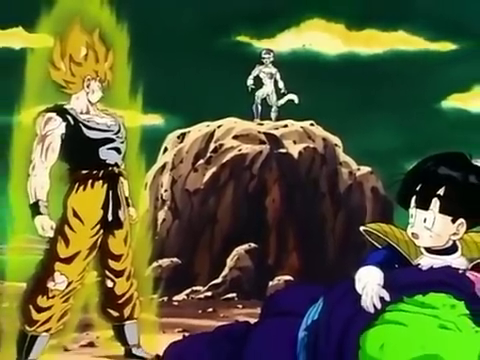

In [ ]:
frameNumber =4350
cap.set(cv2.CAP_PROP_POS_FRAMES, frameNumber-1)
res, frame = cap.read()
if not res:
  print("hi")
cv2_imshow(frame)

In [ ]:
cap = cv2.VideoCapture('Ultra Instinct.gif')

import random
import math

random.seed(4444)

rA = random.sample(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))),int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

frameNumber =0
i=1
for frameNumber in rA:
  print(i)
  cap.set(cv2.CAP_PROP_POS_FRAMES, frameNumber-1)
  res, frame = cap.read()
  if not res:
    print("Bad Frame")
  i+=1

#Very slow if the total number of frames are high

In [ ]:

cap = cv2.VideoCapture('17_10.mp4')

frameNumber =0

for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
  print(i)
  cap.set(cv2.CAP_PROP_POS_FRAMES, frameNumber-1)
  res, frame = cap.read()
  if not res:
    print("Bad Frame")

#Very slow if the total number of frames are high

In [ ]:
frameNumber =500

for i in range(500):
  print(i)
  frame = framesArray[frameNumber]
  #cv2_imshow(frame)

In [ ]:
import cv2
import time
from imutils.video import FileVideoStream

i=0

fvs = FileVideoStream("17_10.mp4").start()

while fvs.more():
  frame = fvs.read()
  print(type(frame))
  i+=1
  print(i)


In [ ]:
frame.shape

(768, 1366, 3)

Get the Length and Width and Color Channels of each frame

Get Frame Information using OpenCV

In [ ]:
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
colorChannels =3 #assumed

In [ ]:
height

768

Get Frame Information Manually

In [ ]:
framesArray[0].shape

In [ ]:
frameShape = framesArray[0].shape #(height,width,color channels)

height = frameShape[0]
width = frameShape[1]
if(len(frameShape)>2):
  colorChannels = frameShape[2]
else:
  colorChannels = 1

IndexError: ignored

Maximum Size of Message that can Be Hidden

In [ ]:
maxMessageSize = (height*width*colorChannels*length)/8

maxMessageSize

42946777728.0

Open Video using MPEG (not worth the hassle)

In [ ]:
import sys
import subprocess

def read_frames(path, res):
    """Read numpy arrays of video frames. Path is the file path
       and res is the resolution as a tuple."""
    args = [
        "ffmpeg",
        "-i",
        path,
        "-f",
        "image2pipe",
        "-pix_fmt",
        "rgb24",
        "-vcodec",
        "rawvideo",
        "-",
    ]

    pipe = subprocess.Popen(
        args,
        stdout=subprocess.PIPE,
        stderr=subprocess.DEVNULL,
        bufsize=res[0] * res[1] * 3,
    )

    while pipe.poll() is None:
        frame = pipe.stdout.read(res[0] * res[1] * 3)
        if len(frame) > 0:
            array = np.frombuffer(frame, dtype="uint8")
            yield array.reshape((res[1], res[0], 3))

In [ ]:
frames = read_frames("17_10.mp4",(480,360))

In [ ]:
len(frames)

TypeError: ignored

In [ ]:
frames = 0
for value in read_frames("Goku Super Saiyan.mp4",(480,360)):
  frames+=1

Save Video

In [ ]:


cap = cv2.VideoCapture('Goku Super Saiyan.mp4') #cap.get(cv2.CAP_PROP_FPS)

width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
colorChannels =3 #assumed


fourcc = cv2.VideoWriter_fourcc(*'ffv1')#ffv1
finalVideo = cv2.VideoWriter('test.avi',fourcc ,cap.get(cv2.CAP_PROP_FPS) , (width,height))
i=0
while(True):
    ret, frame = cap.read()

    if ret == True:

      #print("test")
      finalVideo.write(frame)
      #cv2_imshow( frame)
      i+=1
     # print(i)
    else:
      print(i)
      break

cap.release()
finalVideo.release()

4551


Extract Audio

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip, concatenate_videoclips
import os

video = VideoFileClip("Goku Super Saiyan.mp4")
video.audio.write_audiofile("Audio.wav")

MoviePy - Writing audio in Audio.wav


MoviePy - Done.


In [ ]:
#If Audio LSB is needed:
#https://stackoverflow.com/questions/875476/editing-a-wav-files-using-python
#https://stackoverflow.com/questions/35529520/how-to-convert-a-wav-file-bytes-like-object

Open Audio and New Video

In [ ]:
video_clip = VideoFileClip("test.avi")
audio_clip = AudioFileClip("Audio.wav")

Combine Audio and Video

In [ ]:
final_clip = video_clip.set_audio(audio_clip)

In [ ]:
final_clip.write_videofile("testCombined" + ".avi",codec="ffv1")

Moviepy - Building video testCombined.avi.
MoviePy - Writing audio in testCombinedTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video testCombined.avi



Moviepy - Done !
Moviepy - video ready testCombined.avi


Test Access Speeds

In [ ]:
import cv2
import time
from imutils.video import FileVideoStream

i=0
start = time.time()
fvs = FileVideoStream('Goku Super Saiyan.mp4').start()

while fvs.more():
  i+=1
  frame = fvs.read()


end = time.time()
print(i)
print((end - start))

4552
6.354062080383301


imutils

In [ ]:
import cv2
import time
from imutils.video import FileVideoStream
import time
import random

start = time.time()

cap = cv2.VideoCapture('Goku Super Saiyan.mp4')
numberOfFramesToBeUsed =int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
randomFrameAccess = random.sample(range(numberOfFramesToBeUsed),numberOfFramesToBeUsed)

i=0

#print(randomFrameAccess)
totalFramesFound=0
for frameNumber in randomFrameAccess:
  while fvs.more():
    frame = fvs.read()
    i+=1
    if i == frameNumber:
      #print(str(i) +"   "+str(frameNumber))
      i=0
      totalFramesFound+=1
      break


end = time.time()
print(totalFramesFound)
print((end - start)/60)

0
0.0002446134885152181


opencv

In [ ]:
import random
import time
import cv2

start = time.time()

cap = cv2.VideoCapture('Goku Super Saiyan.mp4')
numberOfFramesToBeUsed =int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
randomFrameAccess = random.sample(range(numberOfFramesToBeUsed),numberOfFramesToBeUsed)

for frameNumber in randomFrameAccess:
  cap.set(cv2.CAP_PROP_POS_FRAMES, frameNumber-1)
  res, frame = cap.read()
  if not res:
    print("Bad Frame")

end = time.time()
print((end - start)/60)

267.3045814037323


Different extracting technique

In [ ]:
!pip install decord

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 32.9 MB/s eta 0:00:00


In [ ]:

import cv2  # still used to save images out
import os
import numpy as np
from decord import VideoReader
from decord import cpu, gpu


def extract_frames(video_path, frames_dir, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using decord's VideoReader
    :param video_path: path of the video
    :param frames_dir: the directory to save the frames
    :param overwrite: to overwrite frames that already exist?
    :param start: start frame
    :param end: end frame
    :param every: frame spacing
    :return: count of images saved
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    # load the VideoReader
    vr = VideoReader(video_path, ctx=cpu(0))  # can set to cpu or gpu .. ctx=gpu(0)

    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = len(vr)

    frames_list = list(range(start, end, every))
    saved_count = 0

    if every > 25 and len(frames_list) < 1000:  # this is faster for every > 25 frames and can fit in memory
        frames = vr.get_batch(frames_list).asnumpy()

        for index, frame in zip(frames_list, frames):  # lets loop through the frames until the end
            save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
            if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # save the extracted image
                saved_count += 1  # increment our counter by one

    else:  # this is faster for every <25 and consumes small memory
        for index in range(start, end):  # lets loop through the frames until the end
            frame = vr[index]  # read an image from the capture

            if index % every == 0:  # if this is a frame we want to write out based on the 'every' argument
                save_path = os.path.join(frames_dir, video_filename, "{:010d}.jpg".format(index))  # create the save path
                if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                    cv2.imwrite(save_path, cv2.cvtColor(frame.asnumpy(), cv2.COLOR_RGB2BGR))  # save the extracted image
                    saved_count += 1  # increment our counter by one

    return saved_count  # and return the count of the images we saved

start = time.time()
extract_frames("Goku Super Saiyan.mp4","tempFrames",False,every=1)

end = time.time()
print((end - start)/60)

0.12142545382181803


fastest method

In [ ]:
import cv2  # still used to save images out
import os
import numpy as np
from decord import VideoReader
from decord import cpu, gpu
import time

def extract_frames(video_path, frames_dir, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using decord's VideoReader
    :param video_path: path of the video
    :param frames_dir: the directory to save the frames
    :param overwrite: to overwrite frames that already exist?
    :param start: start frame
    :param end: end frame
    :param every: frame spacing
    :return: count of images saved
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    assert os.path.exists(video_path)  # assert the video file exists

    # load the VideoReader
    vr = VideoReader(video_path, ctx=cpu(0))  # can set to cpu or gpu .. ctx=gpu(0)

    if start < 0:  # if start isn't specified lets assume 0
        start = 0
    if end < 0:  # if end isn't specified assume the end of the video
        end = len(vr)

    frames_list = list(range(start, end, every))
    saved_count = 0

    if every > 25 and len(frames_list) < 1000:  # this is faster for every > 25 frames and can fit in memory
        frames = vr.get_batch(frames_list).asnumpy()

        for index, frame in zip(frames_list, frames):  # lets loop through the frames until the end
            save_path = os.path.join(frames_dir, video_filename, "{:010d}.png".format(start+index))  # create the save path
            if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # save the extracted image
                saved_count += 1  # increment our counter by one

    else:  # this is faster for every <25 and consumes small memory
        for index in range(start, end):  # lets loop through the frames until the end
            frame = vr[index]  # read an image from the capture

            if index % every == 0:  # if this is a frame we want to write out based on the 'every' argument
                save_path = os.path.join(frames_dir, video_filename, "{:010d}.png".format(start+index))  # create the save path
                if not os.path.exists(save_path) or overwrite:  # if it doesn't exist or we want to overwrite anyways
                    cv2.imwrite(save_path, cv2.cvtColor(frame.asnumpy(), cv2.COLOR_RGB2BGR))  # save the extracted image
                    saved_count += 1  # increment our counter by one

    return saved_count  # and return the count of the images we saved


def video_to_frames(video_path, frames_dir, overwrite=False,start=-1 , end=-1, every=1):
    """
    Extracts the frames from a video
    :param video_path: path to the video
    :param frames_dir: directory to save the frames
    :param overwrite: overwrite frames if they exist?
    :param every: extract every this many frames
    :return: path to the directory where the frames were saved, or None if fails
    """

    video_path = os.path.normpath(video_path)  # make the paths OS (Windows) compatible
    frames_dir = os.path.normpath(frames_dir)  # make the paths OS (Windows) compatible

    video_dir, video_filename = os.path.split(video_path)  # get the video path and filename from the path

    # make directory to save frames, its a sub dir in the frames_dir with the video name
    os.makedirs(os.path.join(frames_dir, video_filename), exist_ok=True)

    print("Extracting frames from {}".format(video_filename))

    extract_frames(video_path, frames_dir,start=start,end=end, every=every)  # let's now extract the frames

    return os.path.join(frames_dir, video_filename)  # when done return the directory containing the frames

start = time.time()

video_to_frames(video_path='Goku Super Saiyan.mp4', frames_dir='tempFrames2', overwrite=False,start=0,end=1000, every=1)
video_to_frames(video_path='Goku Super Saiyan.mp4', frames_dir='tempFrames2', overwrite=False,start=1001,end=2000, every=1)
video_to_frames(video_path='Goku Super Saiyan.mp4', frames_dir='tempFrames2', overwrite=False,start=2001,end=3000, every=1)
video_to_frames(video_path='Goku Super Saiyan.mp4', frames_dir='tempFrames2', overwrite=False,start=3001,end=4000, every=1)
video_to_frames(video_path='Goku Super Saiyan.mp4', frames_dir='tempFrames2', overwrite=False,start=4001,end=4551, every=1)

end = time.time()
print((end - start))

Extracting frames from Goku Super Saiyan.mp4
Extracting frames from Goku Super Saiyan.mp4
Extracting frames from Goku Super Saiyan.mp4
Extracting frames from Goku Super Saiyan.mp4
Extracting frames from Goku Super Saiyan.mp4
65.0138852596283


# **Hiding in Videos**

Encode Message

Load Libraries

In [ ]:
import numpy as np #Manipulate Arrays
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import random
import collections as ct

Open Cover Video

In [ ]:
coverVideo = cv2.VideoCapture('Goku Super Saiyan.mp4')

Get Frame Information

In [ ]:
width  = int(coverVideo.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(coverVideo.get(cv2.CAP_PROP_FRAME_HEIGHT))
colorChannels =3

maxInformationHiddenPerFrame = int((height*width*colorChannels)) #In bits
#Get total number of bits than use 1/8th
#Can multiply 8 and divide by 8

Get the number of frames in the video

In [ ]:
length = int(coverVideo.get(cv2.CAP_PROP_FRAME_COUNT))
fps = coverVideo.get(cv2.CAP_PROP_FPS)

Maximum Possible Message That Can be hidden

In [ ]:
maxMessageSize = (height*width*colorChannels*length)#In bits

#Get total number of bits then divide by 8
#Can multiply 8 and divide by 8

Load File to Hide

In [ ]:
fileName = 'Goku Super Saiyan.mp4'

In [ ]:
with open(fileName, 'rb') as fp:
    hiddenFileByteStream = fp.read()

Prepare File

Convert Byte Stream to ASCII Integers From Hex

In [ ]:
hiddenFileAsBinaryString = ""

for byte in hiddenFileByteStream:
  hiddenFileAsBinaryString += f'{byte:08b}'

Store Important File Information To Hide Later

Get Hash of the Hidden File Byte Stream

In [ ]:
from hashlib import sha256

fileHash = sha256(hiddenFileAsBinaryString.encode('utf-8')).hexdigest()

In [ ]:
hiddenFileBitStreamSize = len(hiddenFileAsBinaryString)
hiddenFileInformationToHide = str(hiddenFileBitStreamSize) + "|"+fileHash+"|"+fileName+"|"

Convert It to ASCII Integers

In [ ]:
informationAsASCII = []

for letter in hiddenFileInformationToHide:
  informationAsASCII.extend(ord(num) for num in letter)

Convert ASCII Integers to Binary

In [ ]:
def IntegerToBinaryString(number):
    return '{0:08b}'.format(number)

hiddenFileInformationBitStream = []

for num in informationAsASCII:
  hiddenFileInformationBitStream.append(IntegerToBinaryString(num))

Make the Binary list into one long String

In [ ]:
hiddenFileInformationBitStreamString = "".join(hiddenFileInformationBitStream)

Combine important information to hide

In [ ]:
informationToHide = hiddenFileInformationBitStreamString+"|"+hiddenFileAsBinaryString

Get Size of the Everything that will be hidden

In [ ]:
sizeOfInformationToBeHidden = len(informationToHide)

Check to See if the Information Will Fit

In [ ]:
if sizeOfInformationToBeHidden> maxMessageSize-10: #Calculations are done in bits
  print("File too big to hide!")

Number of Frames That will be used

In [ ]:
import math

numberOfFramesToBeUsed = int(math.ceil(sizeOfInformationToBeHidden/maxInformationHiddenPerFrame))

Information Before Hiding

[21 19 79]
[25 23 76]
[ 57 116 162]
[25 22 52]
[31 33 81]


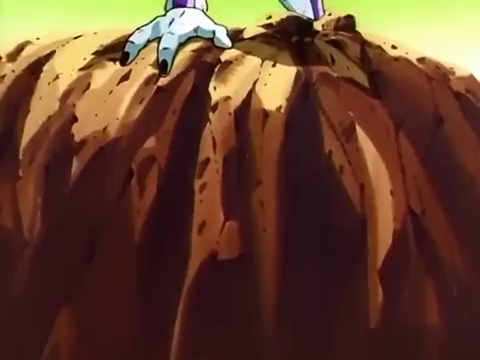

In [ ]:
coverVideo.set(cv2.CAP_PROP_POS_FRAMES, 6-1)
res, frame = coverVideo.read()

print(frame[143, 110])
print(frame[146, 414])
print(frame[62, 13])
print(frame[169, 61])
print(frame[192][42])

cv2_imshow(frame)


Hide the information in the Frames

In [ ]:
import random

#Can use the user's system instead of ram to store information.
#if not os.path.exists("./tempFrames"):
#   os.makedirs("tempFrames")
#temp_folder="./tempFrames"


informationToHideCounter = 0
seed =124124124237890238750215720528972985762098572150987230952897164879265089235798127598210571257223487623487139876109854098126308712659871240986128736128973512946189247981204124123412312
#seed=4444
random.seed(seed)
#Generate Random Frame Access
randomFrameAccess = random.sample(range(numberOfFramesToBeUsed),numberOfFramesToBeUsed)
#randomFrameAccess = list(range(numberOfFramesToBeUsed))
accessedFrames = []
numberOfBitsHidden = 0
coverVideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

#Iterate Video through the random frames
for frameNumber in randomFrameAccess:
  #Select the random frame
  coverVideo.set(cv2.CAP_PROP_POS_FRAMES, frameNumber)
  res, frame = coverVideo.read()
  #Check to see if the frame is readable
  if not res:
    print("Video Contains Bad Frame")
    break
  else:
    #change thge see and generate random pixel points in the frame to hide bits in
    seed+=361
    random.seed(seed)
    #(math.floor()/3) is done because the pixel is chosen randomly, not the color channel
    randomPixelPointsToHideIn = random.sample([[x, y] for x in range(len(frame)) for y in range(len(frame[0]))], math.ceil(maxInformationHiddenPerFrame/3))
    #Start Hiding in the frames
    for point in randomPixelPointsToHideIn:
      #Move through the Colors in each pixel
      for color in range(len(frame[point[0]][point[1]])):
        #When all the bits are hidden break
        if(numberOfBitsHidden==sizeOfInformationToBeHidden):
          accessedFrames.append(frame)
          #frameNumber+=1
          #cv2.imwrite(os.path.join(temp_folder,"tempFrame"+str(frameNumber)+".png"),frame)
          print("Finished Hiding")
          break
        #Change LSB to 1 if needed
        if(informationToHide[numberOfBitsHidden]=='1'):
          frame[point[0]][point[1]][color] |= 1
        else:
        #Change LSB to 0 if needed
          frame[point[0]][point[1]][color] &= ~1



        numberOfBitsHidden+=1
      else:
        continue
      break#If break then break out of entire loop
    else:
      accessedFrames.append(frame)
      #frameNumber+=1
      #cv2.imwrite(os.path.join(temp_folder,"tempFrame_"+str(frameNumber)+".png"),frame)
      continue
    break#same here



Finished Hiding


Information After Hidding Accessed Frames

In [ ]:
for frame in accessedFrames:
  print(frame[0][0])

[61, 156, 38]
[172, 249, 234]
[31, 68, 10]
[25, 69, 6]
[82, 216, 117]
[22, 57, 11]
[30, 74, 8]
[41, 120, 6]
[172, 249, 235]
[24, 95, 33]
[28, 72, 11]
[21, 55, 9]
[25, 59, 6]
[22, 58, 9]
[24, 58, 6]
[68, 170, 59]
[33, 83, 9]
[28, 74, 10]
[23, 57, 10]
[29, 62, 8]
[22, 58, 8]
[20, 54, 8]
[108, 243, 196]
[27, 62, 6]
[29, 66, 8]
[106, 242, 196]
[28, 73, 10]
[27, 70, 9]
[28, 63, 8]
[120, 242, 200]
[69, 171, 59]
[30, 75, 8]
[25, 59, 6]
[31, 75, 8]
[26, 60, 7]
[28, 76, 6]
[172, 249, 234]
[23, 53, 9]
[26, 60, 6]
[21, 55, 8]
[21, 55, 9]
[95, 225, 139]
[22, 56, 9]
[21, 54, 9]
[26, 63, 6]
[22, 58, 9]
[34, 84, 9]
[173, 248, 235]
[78, 192, 78]
[101, 241, 187]
[23, 58, 8]
[24, 60, 5]
[41, 85, 17]
[28, 63, 9]
[30, 69, 11]
[31, 69, 11]
[20, 54, 8]
[173, 248, 234]
[24, 68, 6]
[24, 67, 11]
[42, 85, 16]
[36, 102, 7]
[29, 63, 9]
[102, 234, 157]
[180, 249, 228]
[34, 85, 9]
[21, 55, 9]
[22, 61, 7]
[24, 60, 4]
[25, 59, 7]
[24, 67, 6]
[120, 242, 200]
[25, 61, 4]
[104, 244, 195]
[110, 243, 199]
[21, 55, 8]
[25,

In [ ]:
frame = accessedFrames[5]

print(frame[143, 110])
print(frame[146, 414])
print(frame[62, 13])
print(frame[169, 61])
print(frame[192][42])

cv2_imshow(frame)


TypeError: list indices must be integers or slices, not tuple

Save GIF

Save Only Stego Frames

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'ffv1')#ffv1
finalVideo = cv2.VideoWriter('finalVideo.avi',fourcc ,math.ceil(coverVideo.get(cv2.CAP_PROP_FPS)) , (width,height))
frameProgress=0
coverVideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
frameToAccess=0

while frameProgress<numberOfFramesToBeUsed:

  for i in range(len(randomFrameAccess)):
    if randomFrameAccess[i] == frameProgress:
      frameToAccess=i

  frame = accessedFrames[frameToAccess]

  #finalVideo.set(cv2.CAP_PROP_POS_FRAMES, frameNumber)
  finalVideo.write(frame)
  frameProgress+=1
  print("Frame Progress: "+str(frameProgress))
  if frameProgress==6:
    cv2_imshow(frame)


print("Done")
coverVideo.release()
finalVideo.release()
del(accessedFrames)

error: OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_ffmpeg.cpp:169: error: (-215:Assertion failed) image.depth() == CV_8U || image.depth() == CV_16U in function 'write'


Save the Entire Stego File WIP

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'ffv1')#ffv1
finalVideo = cv2.VideoWriter('finalVideo2.avi',fourcc ,math.ceil(coverVideo.get(cv2.CAP_PROP_FPS)) , (width,height))
frameProgress=0

while(True):
    ret, frame = coverVideo.read()
    if ret == True:

      finalVideo.write(frame)
      frameProgress+=1
      print("Frame Progress: "+str(frameProgress))
    else:
      print("Done")
      break

coverVideo.release()
finalVideo.release()

*Optional*

Save Audio to Stego Frames

Extract audio

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip, concatenate_videoclips,CompositeAudioClip
import os

video = VideoFileClip("Goku Super Saiyan.mp4")
video.audio.write_audiofile("tempAudio.wav",codec = 'pcm_s16le')
#I don't know what default does exactly, pcm_s32le is lossless. (pc encoding)
#There is also pcm_s16le

MoviePy - Writing audio in tempAudio.wav


MoviePy - Done.


Cut and Save Audio

In [ ]:
video_clip = VideoFileClip("finalVideo.avi")
audio_clip = AudioFileClip("tempAudio.wav").set_duration(video_clip.duration)
audio_clip.write_audiofile("tempAudioCut.wav")

OSError: MoviePy error: failed to read the duration of file finalVideo.avi.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
[avi @ 0x63a5500] Format avi detected only with low score of 1, misdetection possible!
finalVideo.avi: Invalid data found when processing input


Merge audio and Video into new video not working

In [ ]:
#final_clip = video_clip.set_audio(final_audio)

WriteCombined Video not working

In [ ]:
#final_clip.write_videofile("finalVideoWithaudio" + ".avi",codec="ffv1")

Moviepy - Building video finalVideoWithaudio.avi.
MoviePy - Writing audio in finalVideoWithaudioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video finalVideoWithaudio.avi



Moviepy - Done !
Moviepy - video ready finalVideoWithaudio.avi


In [ ]:
!pip install ffmpeg-python

In [ ]:
import ffmpeg

video = ffmpeg.input('finalVideo.avi')
audio = ffmpeg.input('tempAudioCut.wav')
videoPath="finalVideoWithAudio.avi"
out = ffmpeg.output(video, audio, videoPath, vcodec='copy', acodec='copy', strict='experimental')
#can use , acodec='flac' but this will prevent
#traversing the video, VLC crashes
#acodec='copy' lossless I think, Allows for traversing the video
#Default acodec may be lossly
#can use aac for lossy audio but very small space
try:
  out.run(capture_stdout=True, capture_stderr=True)
except ffmpeg.Error as e:
 print('stdout:', e.stdout.decode('utf8'))
 print('stderr:', e.stderr.decode('utf8'))
 raise e

Audio Fits entire video WIP

Extract Audio

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip, concatenate_videoclips
import os

video = VideoFileClip("Ultra Instinct.gif")
video.audio.write_audiofile("tempAudio.wav")

AttributeError: ignored

Open Audio and New Video Nt Good

In [ ]:
#video_clip = VideoFileClip("finalVideo2.avi")
#audio_clip = AudioFileClip("Audio.wav")

Not Good

In [ ]:
#final_clip = video_clip.set_audio(audio_clip)

In [ ]:
#final_clip.write_videofile("finalVideoWithaudio" + ".avi",codec="ffv1")

Combine Audio and Video

In [ ]:
import ffmpeg

video = ffmpeg.input('finalVideo.avi')
audio = ffmpeg.input('tempAudio.wav')
videoPath="hey.avi"
out = ffmpeg.output(video, audio, videoPath, vcodec='copy',acodec='copy', strict='experimental')
#can use , acodec='flac' but this will prevent
#traversing the video, VLC crashes
#acodec='copy' lossless I think, Allows for traversing the video
#Default acodec may be lossly
#can use aac for lossy audio but very small space
try:
  out.run(capture_stdout=True, capture_stderr=True)
except ffmpeg.Error as e:
 print('stdout:', e.stdout.decode('utf8'))
 print('stderr:', e.stderr.decode('utf8'))
 raise e

**Extract Hidden File**

In [ ]:
stegoVideo = cv2.VideoCapture('finalVideo.avi')

numberOfFrames = int(stegoVideo.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(stegoVideo.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(stegoVideo.get(cv2.CAP_PROP_FRAME_HEIGHT))
colorChannels =3

maxInformationHiddenPerFrame = int((height*width*colorChannels))

Extreact Header

In [ ]:
import random
import math

seed =124124124237890238750215720528972985762098572150987230952897164879265089235798127598210571257223487623487139876109854098126308712659871240986128736128973512946189247981204124123412312
random.seed(seed)

#Generate Random Frame Access
randomFrameAccess2 = random.sample(range(numberOfFrames),numberOfFrames)

In [ ]:
informationToExtractCounter = 1000
numberOfBitsExtracted = 0
extractedBits = []

#Iterate Video through the random frames
for frameNumber in randomFrameAccess2:
  #Select the random frame
  stegoVideo.set(cv2.CAP_PROP_POS_FRAMES, frameNumber)
  res, frame = stegoVideo.read()
  #Check to see if the frame is readable
  if not res:
    print("Video Contains Bad Frame")
    break
  else:
    #change the seed and generate random pixel points in the frame to extract bits from
    seed+=361
    random.seed(seed)
    #(math.floor()/3) is done because the pixel is chosen randomly, not the color channel
    randomPixelPointsToExtractFrom = random.sample([[x, y] for x in range(len(frame)) for y in range(len(frame[0]))], math.ceil(maxInformationHiddenPerFrame/3))
    #Start Hiding in the frames
    for point in randomPixelPointsToExtractFrom:
      #Move through the Colors in each pixel
      for color in range(len(frame[point[0]][point[1]])):
        #When all the bits are hidden break
        if(numberOfBitsExtracted==informationToExtractCounter):
          print("Finished Extracting")
          break
        extractedBit = frame[point[0]][point[1]][color]&1
        extractedBits.append(str(extractedBit))
        numberOfBitsExtracted+=1

      else:
        continue
      break#If break then break out of entire loop
    else:
      continue
    break#same here



Finished Extracting


In [ ]:
informationToHide[0:32]

'00110001001101000011011000110010'

In [ ]:
extractedBits[0:32]

['0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0']

In [ ]:
HiddenMessageInformationBinaryList = []
BinaryString = ""

i=0
for bit in extractedBits:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0


In [ ]:
def BinaryStringToInteger(BinaryString):
  return int(BinaryString, 2)

In [ ]:
HiddenMessageInformationAscii = []

for BinaryString in HiddenMessageInformationBinaryList:
  HiddenMessageInformationAscii.append(BinaryStringToInteger(BinaryString))

In [ ]:
HiddenMessageInformation = ""

for letter in HiddenMessageInformationAscii:
  HiddenMessageInformation += chr(letter)

In [ ]:
HiddenMessageInformation

'14625600|826d752087a71ebf1723f8cd993f0facae0f61b8cae31c77cb3ad63d3fb1651f|PHP_introduction.pptx|(%\x81\x82\n\x00\x03\x00\x04\x00\x00\x00\x10\x80\x00Í\x06ë¥\x81\x80\x00$\x1b\x80\x00\t\x80\x04'

Hidden File Information

In [ ]:
hiddenFileInformation = HiddenMessageInformation.split("|")

hiddenFileBitSize = int(hiddenFileInformation[0])
hiddenFileSignature = hiddenFileInformation[1]
hiddenFileName = hiddenFileInformation[2]

hiddenMessageInfromationSize = (len(hiddenFileInformation[0])+len(hiddenFileInformation[1])+len(hiddenFileInformation[2])+3)*8

Extract File Bit Stream

In [ ]:
import random

seed =124124124237890238750215720528972985762098572150987230952897164879265089235798127598210571257223487623487139876109854098126308712659871240986128736128973512946189247981204124123412312
random.seed(seed)

#Generate Random Frame Access
randomFrameAccess2 = random.sample(range(numberOfFrames),numberOfFrames)

totalBitsRead=0
numberOfBitsExtracted = 0
hiddenFileExtractedBits = ""

#Iterate Video through the random frames
for frameNumber in randomFrameAccess2:
  #Select the random frame
  stegoVideo.set(cv2.CAP_PROP_POS_FRAMES, frameNumber)
  res, frame = stegoVideo.read()
  #Check to see if the frame is readable
  if not res:
    print("Video Contains Bad Frame")
    break
  else:
    #change the seed and generate random pixel points in the frame to extract bits from
    seed+=361
    random.seed(seed)
    #(math.floor()/3) is done because the pixel is chosen randomly, not the color channel
    randomPixelPointsToExtractFrom = random.sample([[x, y] for x in range(len(frame)) for y in range(len(frame[0]))], math.ceil(maxInformationHiddenPerFrame/3))
    #Start Hiding in the frames
    for point in randomPixelPointsToExtractFrom:
      #Move through the Colors in each pixel
      for color in range(len(frame[point[0]][point[1]])):
        #When all the bits are hidden break
        if(totalBitsRead>hiddenMessageInfromationSize):

          if(numberOfBitsExtracted==hiddenFileBitSize):
            print("Finished Extracting")
            break
          extractedBit = frame[point[0]][point[1]][color]&1
          hiddenFileExtractedBits+=str(extractedBit)
          numberOfBitsExtracted+=1

        totalBitsRead+=1
      else:
        continue
      break#If break then break out of entire loop
    else:
      continue
    break#same here


Finished Extracting


Convert Bit Stream to Byte Stream and Get the Hash of the bit stream

In [ ]:
HiddenMessageInformationBinaryList = []
BinaryString = ""

i=0
for bit in hiddenFileExtractedBits:

  BinaryString+=bit
  i+=1

  if i>7:
    HiddenMessageInformationBinaryList.append(BinaryString)
    BinaryString = ""
    i=0

from hashlib import sha256

generatedFileSignature = sha256(hiddenFileExtractedBits.encode('utf-8')).hexdigest()

del(hiddenFileExtractedBits)

HiddenMessageInformationAscii = []

for BinaryString in HiddenMessageInformationBinaryList:
  HiddenMessageInformationAscii.append(int(BinaryString, 2))
HiddenMessageInformation = ""

del(HiddenMessageInformationBinaryList)
#for letter in HiddenMessageInformationAscii:
#  HiddenMessageInformation += chr(letter)

Compare Generated Hash to Extracted Hash to test Integrity

In [ ]:
if hiddenFileSignature==generatedFileSignature:
  print("File Extracted Correctly")
else:
  print("Failed")

File Extracted Correctly


Write Extracted File

In [ ]:
with open(hiddenFileName, 'wb') as f:
    f.write(bytes(HiddenMessageInformationAscii))

del(HiddenMessageInformationAscii)

#del(HiddenMessageInformation)

stegoVideo.release()

# **Hiding in Videos 2**